In [1]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import col, to_date, when, concat, lit
from pyspark.sql.types import TimestampType

spark = SparkSession.builder \
    .appName("green preprocessing") \
    .config("spark.sql.repl.eagerEval.enabled", True) \
    .config("spark.sql.parquet.cacheMetadata", "true") \
    .config("spark.sql.session.timeZone", "Etc/UTC") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble
23/09/02 16:11:11 WARN Utils: Your hostname, NivethanAsus resolves to a loopback address: 127.0.1.1; using 172.24.38.5 instead (on interface eth0)
23/09/02 16:11:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/02 16:11:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
path1 = "../../../data/raw/tables/transactions_cleaned.parquet"
df= spark.read.parquet(path1)
df.show(5)
df.count()
df.printSchema()

+-------+------------+------------------+--------------------+--------------+
|user_id|merchant_abn|      dollar_value|            order_id|order_datetime|
+-------+------------+------------------+--------------------+--------------+
|  18478| 62191208634|63.255848959735246|949a63c8-29f7-4ab...|    2021-08-20|
|      2| 15549624934| 130.3505283105634|6a84c3cf-612a-457...|    2021-08-20|
|  18479| 64403598239|120.15860593212783|b10dcc33-e53f-425...|    2021-08-20|
|      3| 60956456424| 136.6785200286976|0f09c5a5-784e-447...|    2021-08-20|
|  18479| 94493496784| 72.96316578355305|f6c78c1a-4600-4c5...|    2021-08-20|
+-------+------------+------------------+--------------------+--------------+
only showing top 5 rows



root
 |-- user_id: long (nullable = true)
 |-- merchant_abn: long (nullable = true)
 |-- dollar_value: double (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_datetime: date (nullable = true)



In [4]:
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = df.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(pandas_df['order_datetime'], pandas_df['dollar_value'], 'o-', label='Dollar Value')
plt.xlabel('Order Datetime')
plt.ylabel('Dollar Value')
plt.title('Dollar Value vs Order Datetime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Exception ignored in: <function JavaObject.__init__.<locals>.<lambda> at 0x7fed0f7b71f0>
Traceback (most recent call last):
  File "/home/niyer/.local/lib/python3.8/site-packages/py4j/java_gateway.py", line 1359, in <lambda>
    lambda wr, cc=self._gateway_client, id=self._target_id:
KeyboardInterrupt: 


<Figure size 1200x600 with 0 Axes>

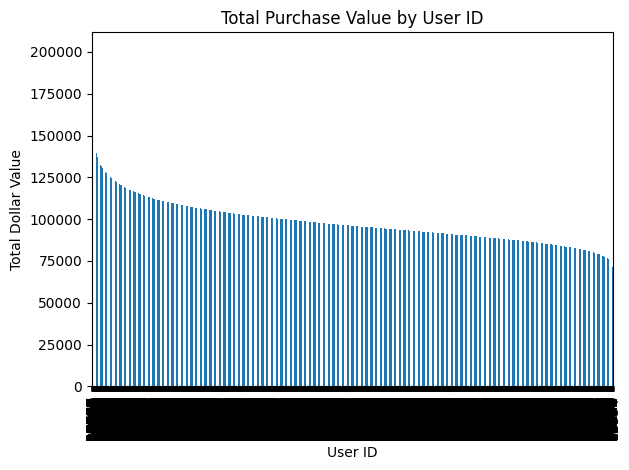

In [6]:
from pyspark.sql import functions as F

aggregated_df = df.groupBy("user_id").agg(F.sum("dollar_value").alias("total_dollar_value"))
pandas_agg_df = aggregated_df.toPandas()
plt.figure(figsize=(12, 6))
pandas_agg_df.sort_values('total_dollar_value', ascending=False).plot(kind='bar', x='user_id', y='total_dollar_value', legend=False)
plt.xlabel('User ID')
plt.ylabel('Total Dollar Value')
plt.title('Total Purchase Value by User ID')
plt.tight_layout()
plt.show()



In [5]:
# Define the range and interval for x-axis
x_range = (2000, 40000)
x_ticks_interval = 3000
x_ticks = list(range(x_range[0], x_range[1] + x_ticks_interval, x_ticks_interval))

# Plot the histogram with adjusted x-axis
plt.figure(figsize=(10, 6))
plt.hist(dollar_values['dollar_value'], bins=20, edgecolor='black', range=x_range)
plt.xticks(x_ticks)
plt.xlabel('Dollar Value')
plt.ylabel('Frequency')
plt.title('Distribution of Dollar Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



NameError: name 'dollar_values' is not defined

<Figure size 1000x600 with 0 Axes>

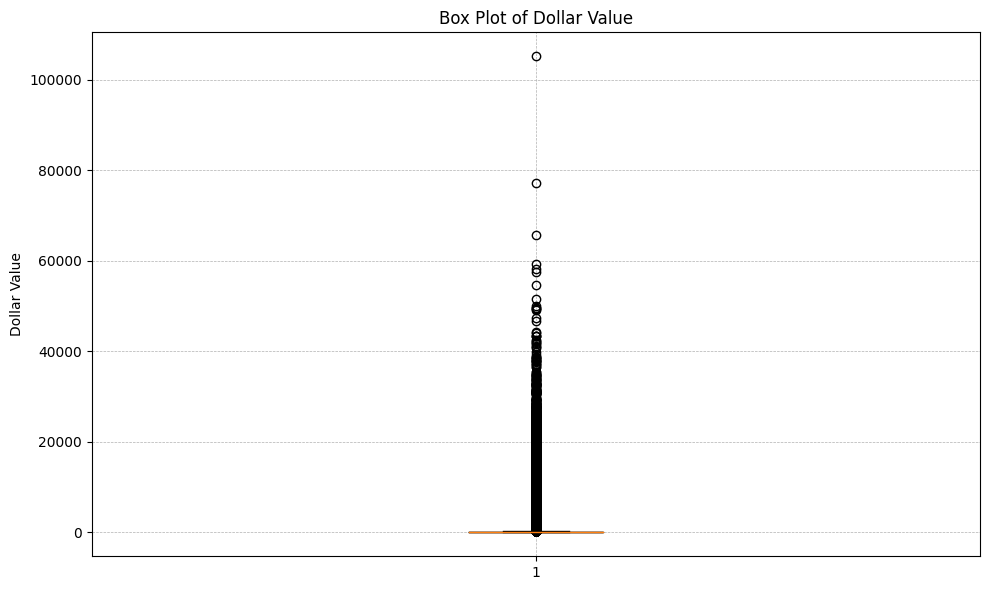

In [ ]:
# Convert the dollar_value column to Pandas for visualization
dollar_values_pd = df.select('dollar_value').toPandas()

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(dollar_values_pd['dollar_value'])
plt.title('Box Plot of Dollar Value')
plt.ylabel('Dollar Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
